In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# EDA

In [2]:
data = pd.read_csv('../input/heart-failure-prediction/heart.csv')

In [3]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [7]:
"""
ASY: Asymptomatic
NAP: Non-Anginal Pain
ATA: Atypical Angina
TA: Typical Angina
"""
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [8]:
"""
LVH: left ventricular hypertrophy 
ST: ST–T wave abnormality
"""
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

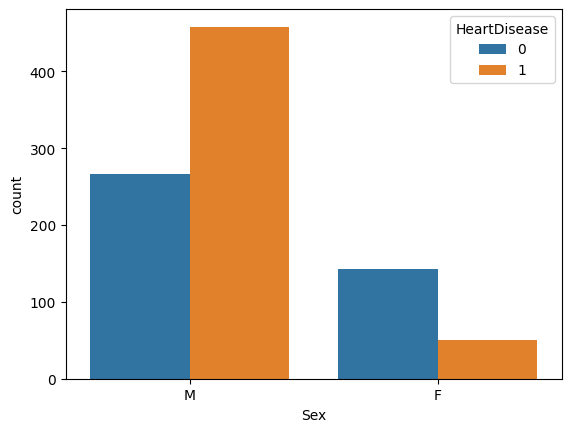

In [11]:
sns.countplot(data=data, x='Sex', hue='HeartDisease')

<Axes: xlabel='ChestPainType', ylabel='count'>

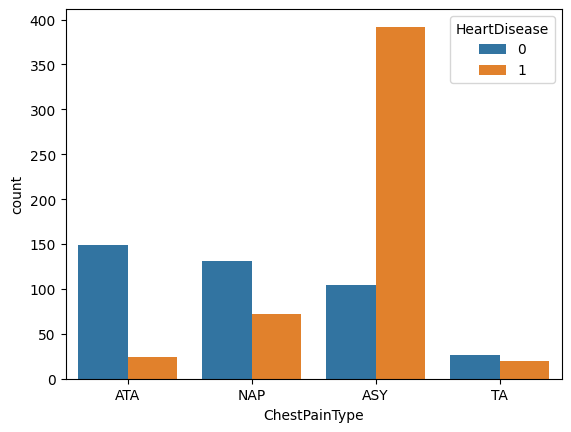

In [12]:
sns.countplot(data=data, x='ChestPainType', hue='HeartDisease')

<Axes: xlabel='Cholesterol', ylabel='Count'>

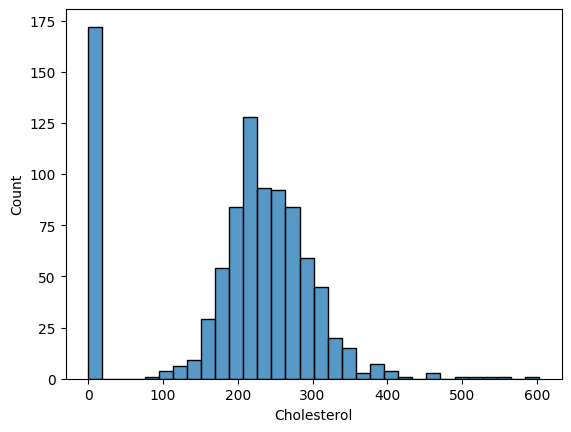

In [13]:
sns.histplot(data, x='Cholesterol')

In [14]:
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)

In [15]:
# Using the median to handle missing values
data['Cholesterol'].fillna(data['Cholesterol'].median(), inplace=True)

/tmp/ipykernel_55/3577679837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cholesterol'].fillna(data['Cholesterol'].median(), inplace=True)


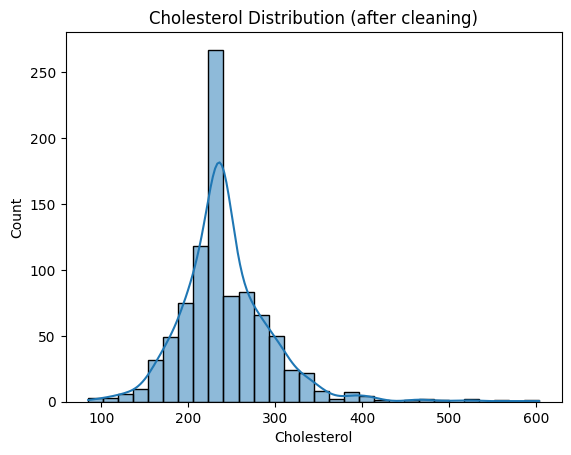

In [16]:
sns.histplot(data['Cholesterol'], bins=30, kde=True)
plt.title('Cholesterol Distribution (after cleaning)')
plt.show()

<Axes: xlabel='Cholesterol', ylabel='HeartDisease'>

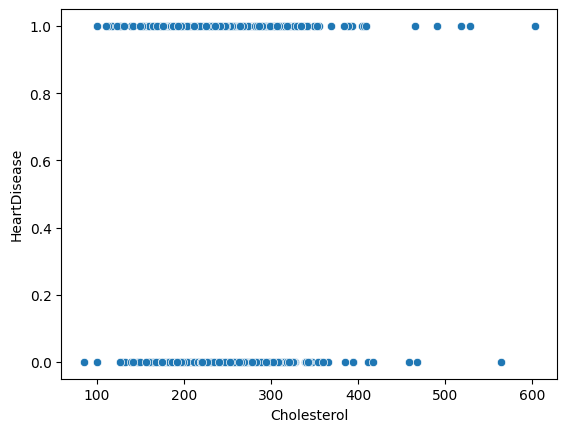

In [17]:
sns.scatterplot(data, x='Cholesterol', y='HeartDisease')

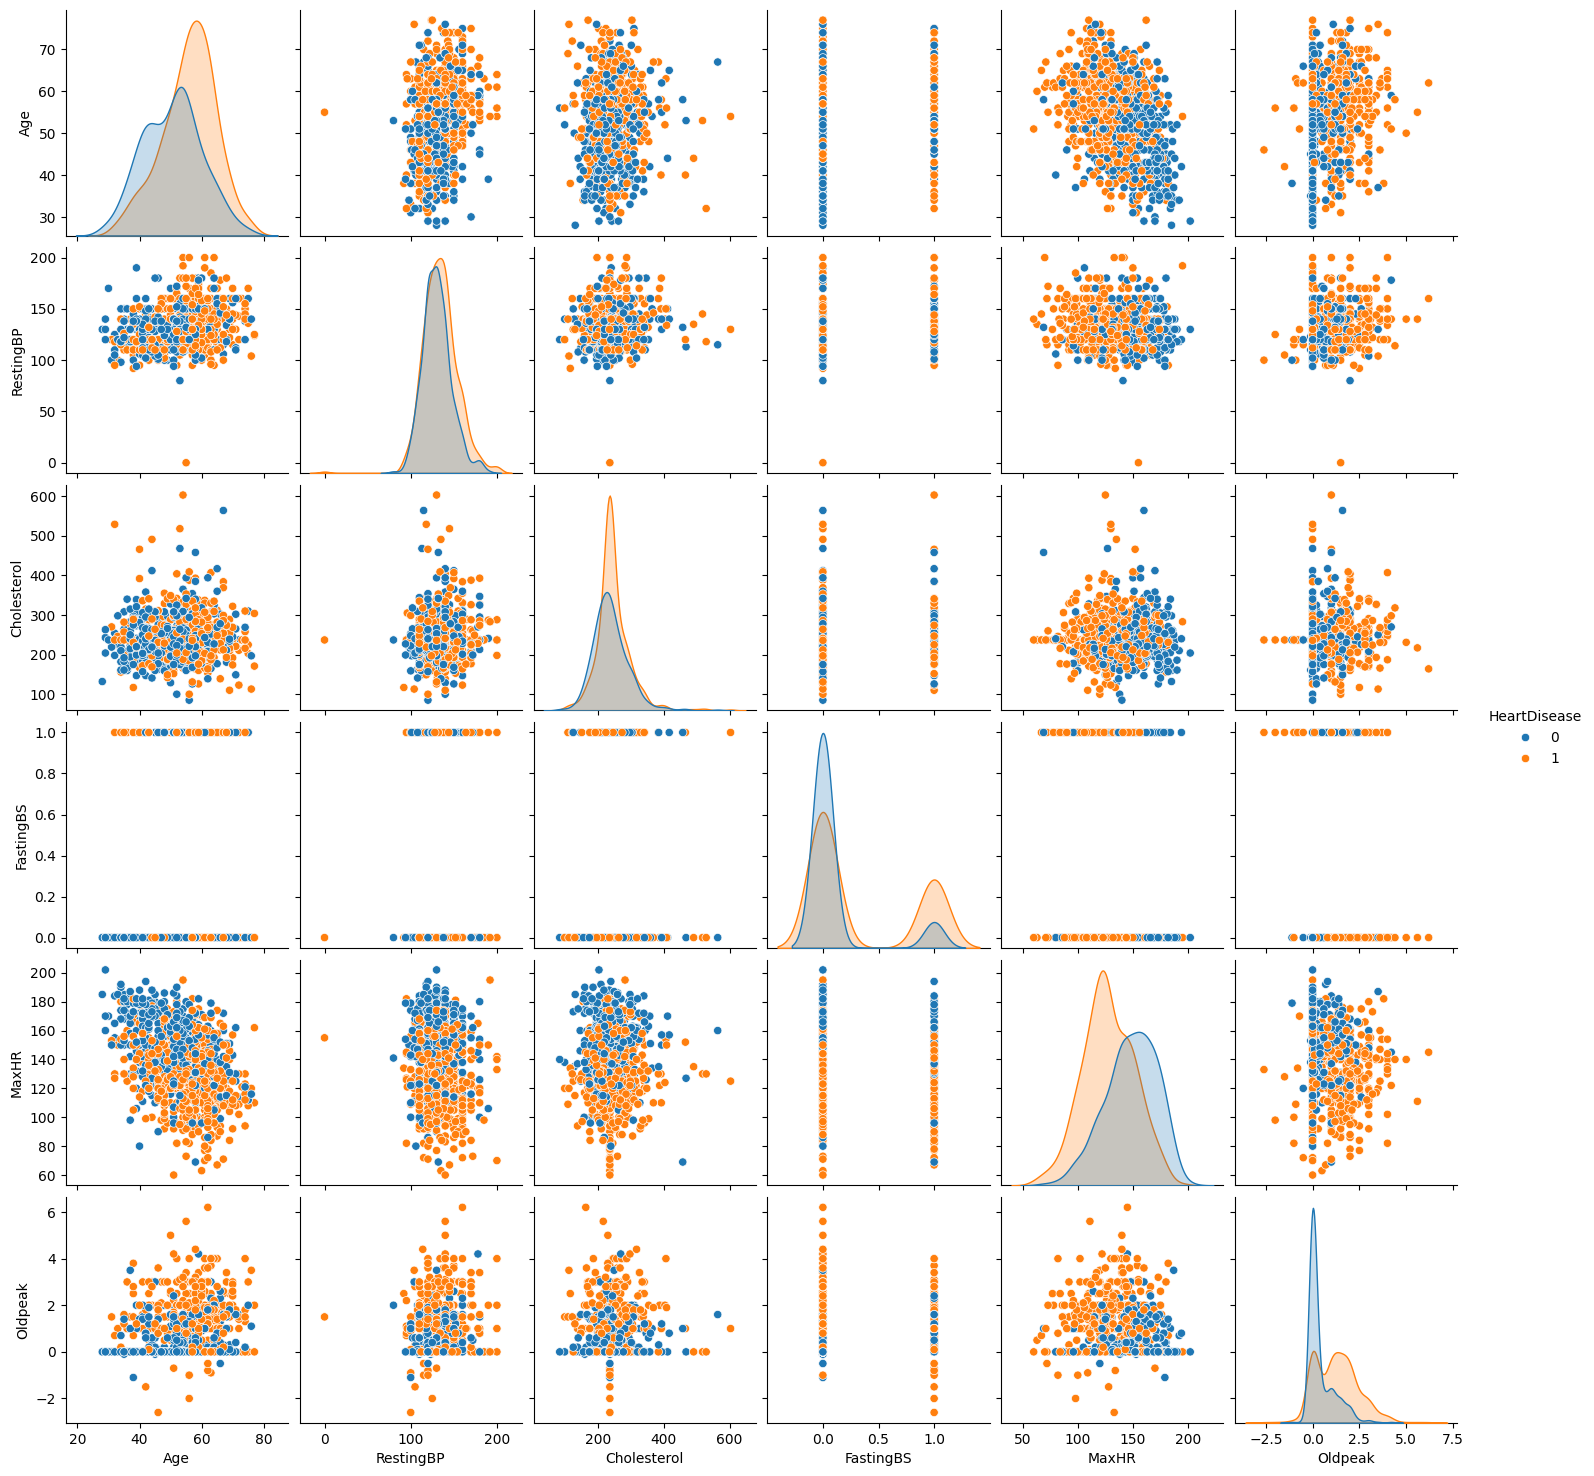

In [18]:
sns.pairplot(data, hue="HeartDisease")

In [19]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [20]:
col = ['ChestPainType', 'RestingECG', 'ST_Slope']
data = pd.get_dummies(data, columns=col, drop_first=False)

In [21]:
data.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289.0,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180.0,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283.0,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214.0,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195.0,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


In [22]:
bool_col = data.select_dtypes(include='bool').columns
data[bool_col] = data[bool_col].astype('int')

In [23]:
data.head(5)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289.0,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180.0,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283.0,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214.0,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195.0,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


In [24]:
data.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol          float64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ASY      int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_LVH         int64
RestingECG_Normal      int64
RestingECG_ST          int64
ST_Slope_Down          int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

In [25]:
corr = data.corr()['HeartDisease'].sort_values(ascending=False)
print('Correlation: ')
print(corr)

Correlation: 
HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina       0.494282
Oldpeak              0.403951
Sex                  0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.107589
RestingECG_ST        0.102527
Cholesterol          0.076114
RestingECG_LVH       0.010670
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


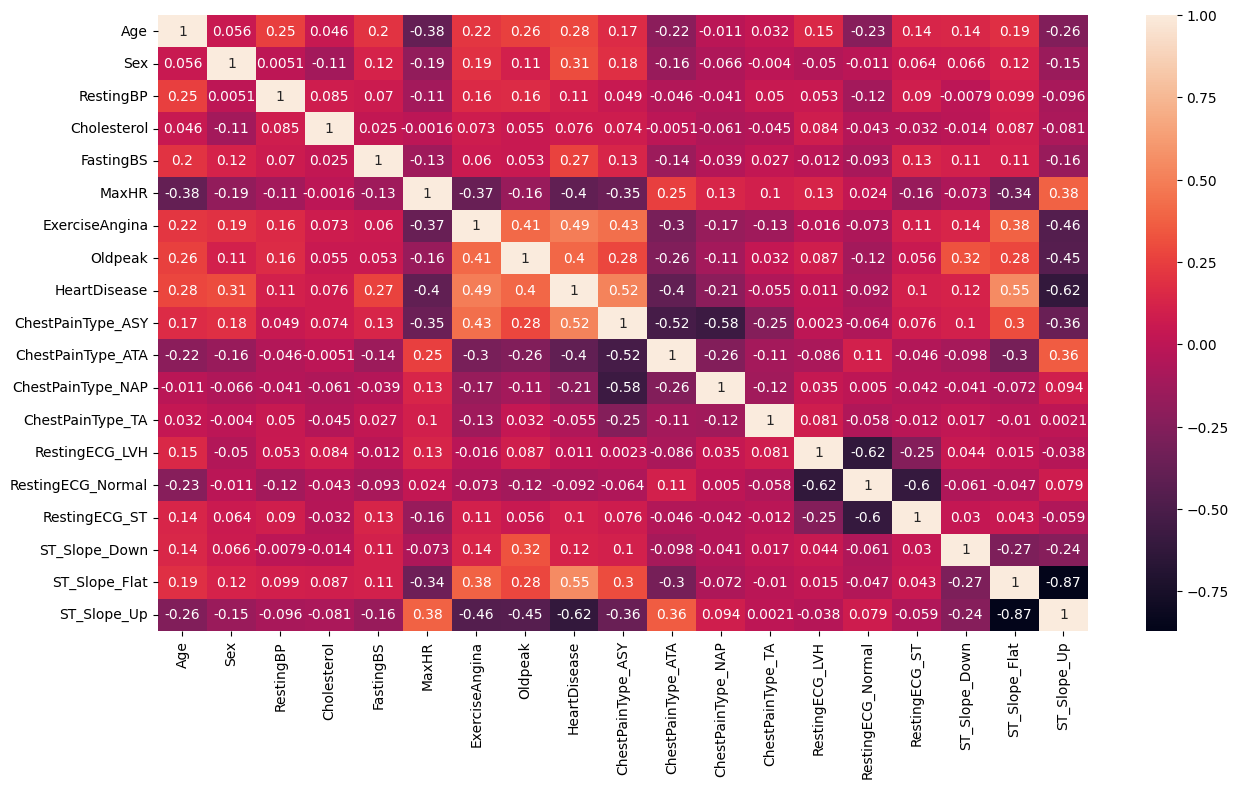

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [27]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Data Splitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [29]:
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (642, 18)
y_train.shape = (642,)
X_test.shape = (276, 18)
y_test.shape = (276,)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML Models

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred_lr = lr.predict(X_test)

In [33]:
acc_lr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
print(f'Accuracy for Logistic Regression: {acc_lr}')

Accuracy for Logistic Regression: 86.59


In [34]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_lr)} \n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_lr)}')

Confusion Matrix: 
[[100  12]
 [ 25 139]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       112
           1       0.92      0.85      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



# Support Vector Machine

In [35]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf', gamma=0.1, random_state=42)
svc.fit(X_train, y_train)

SVC(gamma=0.1, random_state=42)

In [36]:
y_pred_svc = svc.predict(X_test)

In [37]:
acc_svc = round(accuracy_score(y_test, y_pred_svc)*100, 2)
print(f'Accuracy for SVC: {acc_svc}')

Accuracy for SVC: 86.96


In [38]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_svc)} \n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_svc)}')

Confusion Matrix: 
[[ 98  14]
 [ 22 142]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.84       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



# Naive Bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [40]:
y_pred_nb = nb.predict(X_test)

In [41]:
acc_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
print(f'Accuracy for Naive Bayes: {acc_nb}')

Accuracy for Naive Bayes: 85.87


In [42]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_nb)} \n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_nb)}')

Confusion Matrix: 
[[ 99  13]
 [ 26 138]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       112
           1       0.91      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=32, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=32, weights='distance')

In [44]:
y_pred_knn = knn.predict(X_test)

In [45]:
acc_knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print(f'Accuracy for KNN: {acc_knn}')

Accuracy for KNN: 87.32


In [46]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_knn)} \n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_knn)}')

Confusion Matrix: 
[[ 99  13]
 [ 22 142]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [48]:
y_pred_dt = dt.predict(X_test)

In [49]:
acc_dt = round(accuracy_score(y_test, y_pred_dt)*100, 2)
print(f'Accuracy for Decision Tree: {acc_dt}')

Accuracy for Decision Tree: 83.33


In [50]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dt)} \n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_dt)}')

Confusion Matrix: 
[[ 96  16]
 [ 30 134]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276



# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [52]:
y_pred_rf = rf.predict(X_test)

In [53]:
acc_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print(f'Accuracy for Random Forest: {acc_rf}')

Accuracy for Random Forest: 85.87


In [54]:
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_rf)} \n')
print(f'Classification Report: \n{classification_report(y_test, y_pred_rf)}')

Confusion Matrix: 
[[ 95  17]
 [ 22 142]] 

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       112
           1       0.89      0.87      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



In [55]:
data_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'SVC',
        'Decision Tree',
        'Random Forest',
        'KNN',
        'Naive Bayes'
    ],
    'Accuracy': [
        acc_lr,
        acc_svc,
        acc_dt,
        acc_rf,
        acc_knn,
        acc_nb
    ]
}).sort_values(by='Accuracy', ascending=False)

In [56]:
data_df

,Model,Accuracy
4,KNN,87.32
1,SVC,86.96
0,Logistic Regression,86.59
3,Random Forest,85.87
5,Naive Bayes,85.87
2,Decision Tree,83.33


# KNN is the best model with accuracy 87.32%